In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
filename = "datasets/diamonds.csv"
df = pd.read_csv(filename)

df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Data cleaning

In [3]:
# The data cleaning process will involve converting categorical variable
# such as carats, cut, color and clarity to integers

In [4]:
df.shape

(53940, 11)

In [5]:
dupe = df.duplicated()
df.loc[dupe]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z


In [6]:
df.shape

(53940, 11)

In [7]:
df = df.drop(df.columns[0] , axis=1)

In [8]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [9]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [10]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [11]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [12]:
#Create a dictionary for each unique value on the category variables and assigns
# a unique integer to each

In [13]:
cutdicttext = {'Ideal': '1 Ideal', 'Premium': '5 Premium', 'Good': '3 Good', 'Very Good': '4 Very Good',
                                  'Fair': '0 Fair'}

In [14]:
cutdictnum = {'Fair': 0, 'Good': 3, 'Ideal': 1, 'Premium': 5, 'Very Good': 4}

In [15]:
# the dictiriory is then use to replace each variable

In [16]:
ndf = df.replace({"cut": cutdictnum})

In [17]:
ndf.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,5,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,5,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [18]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [19]:
claritydictnum = {'SI2': 0, 'SI1': 1, 'VS1': 2, 'VS2': 3, 'VVS2': 4, 'VVS1': 5, 'I1': 6, 'IF': 7}

In [20]:
ndf = ndf.replace({"clarity": claritydictnum})

In [21]:
ndf.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,E,0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,5,E,1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,E,2,56.9,65.0,327,4.05,4.07,2.31
3,0.29,5,I,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,J,0,63.3,58.0,335,4.34,4.35,2.75


In [22]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [23]:
colordictnum = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [24]:
ndf = ndf.replace({"color": colordictnum})

In [25]:
ndf.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,1,0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,5,1,1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,1,2,56.9,65.0,327,4.05,4.07,2.31
3,0.29,5,5,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,6,0,63.3,58.0,335,4.34,4.35,2.75


# Regression Analysis

In [26]:
corr = ndf.corr()

In [27]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [28]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

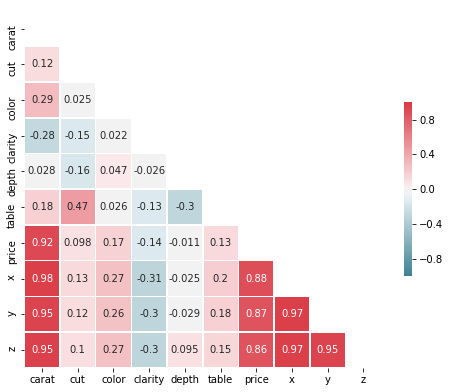

In [29]:
plt.subplots(figsize=(8,8))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin= -1.0, center=0, annot=True,
            square=True, linewidths=.6, cbar_kws={"shrink": .4})

In [30]:
# the heatmap of the correlation shows in a visual way that price is highly
# correlated with carrat, color, clarity, x, y, z and table

In [31]:
ndf.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.124498,0.291437,-0.281218,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,0.124498,1.000000,0.025214,-0.146267,-0.161115,0.466135,0.097781,0.131264,0.122902,0.104866
color,0.291437,0.025214,1.000000,0.022250,0.047279,0.026465,0.172511,0.270287,0.263584,0.268227
clarity,-0.281218,-0.146267,0.022250,1.000000,-0.025877,-0.133692,-0.140270,-0.305918,-0.297037,-0.299969
depth,0.028224,-0.161115,0.047279,-0.025877,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,0.466135,0.026465,-0.133692,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,0.097781,0.172511,-0.140270,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,0.131264,0.270287,-0.305918,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,0.122902,0.263584,-0.297037,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.104866,0.268227,-0.299969,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000



## Linear Regresssion

In [32]:
import statsmodels.formula.api as smf

In [33]:
result = smf.ols('price ~ carat + x + y + z + color + table + clarity', data=ndf).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                 5.766e+04
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        23:08:08   Log-Likelihood:            -4.6611e+05
No. Observations:               53940   AIC:                         9.322e+05
Df Residuals:                   53932   BIC:                         9.323e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4045.8099    180.507     22.414      0.000    3692.015    4399.605
carat        1.04e+04     57.179    181.840      0.000    1.03e+04    1.05e+04
x           -625.5272     36.884    -16.959      0.000    -697.821    -553.234
y            141.2993     23.243      6.079      0.000      95.743     186.855
z           -601.9590     35.783    -16.822      0.000    -672.095    -531.823
color       -291.1274      3.653    -79.697      0.000    -298.287    -283.968
table        -59.5322      2.738    -21.740      0.000     -64.899     -54.165
clarity      297.4594      3.550     83.789      0.000     290.501     304.418
==============================================================================
Omnibus:                    15467.332   Durbin-Watson:                   1.205
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           897870.400
Skew:                          -0.549   Prob(JB):                         0.00
Kurtosis:                      22.957   Cond. No.                     1.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
result = smf.ols('price ~ carat + x + y + z + color + table + clarity -1', data=ndf).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.200e+05
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        23:08:09   Log-Likelihood:            -4.6636e+05
No. Observations:               53940   AIC:                         9.327e+05
Df Residuals:                   53933   BIC:                         9.328e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       9764.4876     49.949    195.490      0.000    9666.588    9862.388
x           -471.2334     36.404    -12.944      0.000    -542.586    -399.881
y            152.2692     23.345      6.522      0.000     106.512     198.026
z           -437.1725     35.182    -12.426      0.000    -506.130    -368.215
color       -285.7900      3.662    -78.041      0.000    -292.968    -278.612
table         -7.8980      1.487     -5.310      0.000     -10.813      -4.983
clarity      313.2612      3.496     89.618      0.000     306.410     320.112
==============================================================================
Omnibus:                    14170.593   Durbin-Watson:                   1.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           700227.196
Skew:                          -0.463   Prob(JB):                         0.00
Kurtosis:                      20.627   Cond. No.                         551.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
result = smf.ols('carat ~ x + y + z + table', data=ndf).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  carat   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 2.653e+05
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        23:08:09   Log-Likelihood:                 45423.
No. Observations:               53940   AIC:                        -9.084e+04
Df Residuals:                   53935   BIC:                        -9.079e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5133      0.012   -129.092      0.000      -1.536      -1.490
x              0.3608      0.002    155.088      0.000       0.356       0.365
y              0.0050      0.002      2.855      0.004       0.002       0.009
z              0.0763      0.003     28.258      0.000       0.071       0.082
table         -0.0010      0.000     -4.654      0.000      -0.001      -0.001
==============================================================================
Omnibus:                    57823.620   Durbin-Watson:                   0.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         25229006.314
Skew:                           4.791   Prob(JB):                         0.00
Kurtosis:                     108.516   Cond. No.                     1.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
result = smf.ols('carat ~ x + y + z + table - 1', data=ndf).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  carat   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 8.031e+05
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        23:08:10   Log-Likelihood:                 38162.
No. Observations:               53940   AIC:                        -7.632e+04
Df Residuals:                   53936   BIC:                        -7.628e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.4007      0.003    151.884      0.000       0.395       0.406
y              0.0008      0.002      0.390      0.697      -0.003       0.005
z              0.0182      0.003      5.957      0.000       0.012       0.024
table         -0.0272   4.74e-05   -574.237      0.000      -0.027      -0.027
==============================================================================
Omnibus:                    48055.591   Durbin-Watson:                   1.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8994043.168
Skew:                           3.653   Prob(JB):                         0.00
Kurtosis:                      65.836   Cond. No.                         419.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# carat is highly correlated with x, y, and z, so we will drop it from the regression
# to see see the impact on the R-square factor

In [38]:
result = smf.ols('price ~ carat + color + table + clarity', data=ndf).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                 9.796e+04
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        23:08:11   Log-Likelihood:            -4.6681e+05
No. Observations:               53940   AIC:                         9.336e+05
Df Residuals:                   53935   BIC:                         9.337e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    613.8881    156.968      3.911      0.000     306.229     921.548
carat       8437.0327     13.975    603.711      0.000    8409.641    8464.424
color       -285.8403      3.696    -77.327      0.000    -293.085    -278.595
table        -58.9102      2.730    -21.577      0.000     -64.262     -53.559
clarity      316.0317      3.561     88.760      0.000     309.053     323.010
==============================================================================
Omnibus:                    11412.030   Durbin-Watson:                   1.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           421931.087
Skew:                          -0.202   Prob(JB):                         0.00
Kurtosis:                      16.696   Cond. No.                     1.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
result = smf.ols('price ~ carat + color + table + clarity -1', data=ndf).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 2.062e+05
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        23:08:12   Log-Likelihood:            -4.6682e+05
No. Observations:               53940   AIC:                         9.337e+05
Df Residuals:                   53936   BIC:                         9.337e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       8432.5003     13.929    605.392      0.000    8405.199    8459.801
color       -285.0919      3.692    -77.218      0.000    -292.328    -277.855
table        -48.2940      0.293   -164.928      0.000     -48.868     -47.720
clarity      318.1121      3.521     90.347      0.000     311.211     325.013
==============================================================================
Omnibus:                    11437.683   Durbin-Watson:                   1.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           423068.749
Skew:                          -0.207   Prob(JB):                         0.00
Kurtosis:                      16.714   Cond. No.                         135.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# the highest R-square (0.94) is achieved when carat, x, y, z, color, table and clarity 
# are used
#result = smf.ols('price ~ carat + x + y + z + color + table + clarity -1', data=ndf).fit()

In [41]:
nndf = ndf.drop(['depth'], axis=1)

In [68]:
df["carat"].min()

0.2

In [67]:
df["carat"].max()

5.01

In [63]:
#Define bins as 0-59, 60-69, 70-79, 80-89, 90-100
bins = [0, 1, 2, 3, 4, 5, 6]

# Create names for the four groups
group_names = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6']

#make new column with letter grades
ncdf = df.copy()
ncdf['carat'] = pd.cut(ndf['carat'], bins, labels=group_names)
ncdf.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0-1,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0-1,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0-1,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0-1,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0-1,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


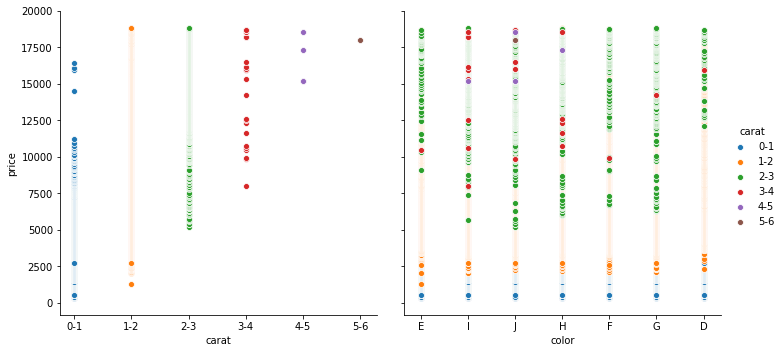

In [64]:
g = sns.pairplot(ncdf, hue = "carat", 
                 y_vars = ["price"], 
                 x_vars = ["carat", "color"] , height = 5)


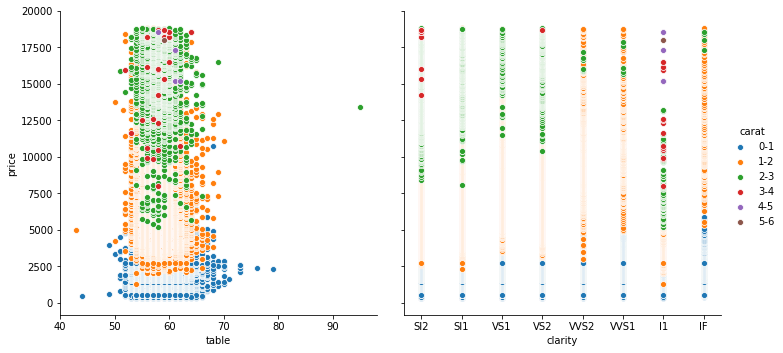

In [65]:
g = sns.pairplot(ncdf, hue = "carat", 
                 y_vars = ["price"], 
                 x_vars = ["table", "clarity"] , height = 5)

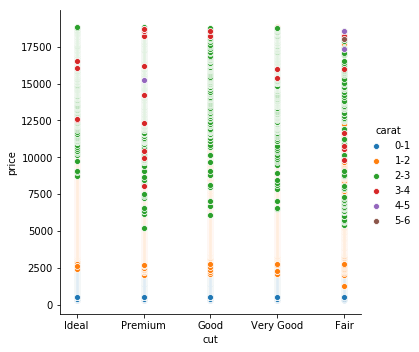

In [66]:
g = sns.pairplot(ncdf, hue = "carat", 
                 y_vars = ["price"], 
                 x_vars = ["cut"] , height = 5)